<a href="https://colab.research.google.com/github/KevKil/SupLearn_ML_Wk3/blob/main/Kevin_Kilonzo_(Machine_Learning)Supervised_Learning_WK3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 3 Supervised Learning Independent Project

## Assessment Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. 

## Implimentation

### 1. Defining the Question

#### a) Specifying the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### b) Defining the Metric for Success

To be able to predict whether or not the patient's symptoms indicate that the patient has hypothyroid with an accuracy of at least 80% 

#### c) Understanding the context 

The dataset gives information about patients who have hypothyroidism and the features which are important to determine if the patient has hypothyroidism or not

#### d) Recording the Experimental Design

1.   Importing the libraries
2.   Reading the data
3.   Data wrangling
4.   Exploratory data analysis
5.   Data preprocessing
6.   Supervised learning
7.   Conclusions



#### e) Data relevance / Appropriateness of Data

Dataset Columns

* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4

## Importing libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [156]:
!pip install --upgrade scikit-learn==0.20.3

## Reading data

In [157]:
# Loading the dataset
data = pd.read_csv('http://bit.ly/hypothyroid_data')


### Data Exploration

In [158]:
# Preview of the dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [159]:
# Preview of the tail of the dataset
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [160]:
# Checking number of rows and columns
data.shape

(3163, 26)

In [161]:
# Checking columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## Data wrangling

In [162]:
# Checking for anomalies
#iterating through all columns for unique values in the dataset
for i in data.columns:
  #to print a line in between the columns
  print('\n')
  print(data[i].unique())



['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' 

From this we can see there are columns with anomalies which will replace with null values 

In [163]:
# Replace ? with nulls
data = data.replace('?', np.nan)

In [165]:
# Converting age column to integer
data.age = pd.to_numeric(data.age, errors='coerce')
data.age.dtypes

dtype('float64')

In [166]:
# Converting all float columns to float
float_cols = ['TSH','T3','TT4','T4U','FTI','TBG']
for i in float_cols:
  data[i] = pd.to_numeric(data[i], errors='coerce')


In [167]:
# Dataset for decision trees
df_decision = data.copy()

In [168]:
# Checking changes
data.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [169]:
# Checking null values
# 
data.isna().sum()/data.shape[0]

status                       0.000000
age                          0.141005
sex                          0.023079
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
thyroid_surgery              0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
pregnant                     0.000000
sick                         0.000000
tumor                        0.000000
lithium                      0.000000
goitre                       0.000000
TSH_measured                 0.000000
TSH                          0.147961
T3_measured                  0.000000
T3                           0.219728
TT4_measured                 0.000000
TT4                          0.078723
T4U_measured                 0.000000
T4U                          0.078407
FTI_measured                 0.000000
FTI                          0.078090
TBG_measured                 0.000000
TBG                          0.917800
dtype: float

* The null values in the TSH,T3,TT4,T4U,FTI,TBG are the people who have not been measured and thus the null values will be replaced with 0
* The null values in sex are people who have not submitted if they were male or female and will be replaced with other
* the null values in age will be replaced with the mean

In [170]:
# Replacing null values in sex with other
data.sex = data.sex.fillna('Other')
data.sex.unique()

array(['M', 'F', 'Other'], dtype=object)

In [172]:
# Replacing null values in age with the mean of age
data.age = data.age.fillna(data.age.mean())
data.age.isna().any()

False

In [173]:
# Replacing null values in the float columns with 0
data[float_cols] = data[float_cols].fillna(0)
data[float_cols].isna().any()

TSH    False
T3     False
TT4    False
T4U    False
FTI    False
TBG    False
dtype: bool

In [174]:
# Checking if there are any null values
data.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [175]:
# Checking duplicates
# 
data.duplicated().sum()/data.shape[0]

0.024343977236800506

Decided not to drop duplicats as they maybe necessary

In [176]:
# Dataset for SVM
df_SVM = data.copy()
df_SVM.shape

(3163, 26)

## Exploratory Data analysis

### a) Univariate

In [22]:
# Statistical summary of the dataset
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.132469,5.046782,1.513531,100.281031,0.901502,106.386310,2.571483
std,17.882050,22.160083,1.191836,52.588757,0.341286,65.607474,10.204298
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.500000,76.000000,0.820000,85.000000,0.000000
50%,51.000000,0.400000,1.600000,100.000000,0.940000,105.000000,0.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


Ages are within the expected range so no anomalies

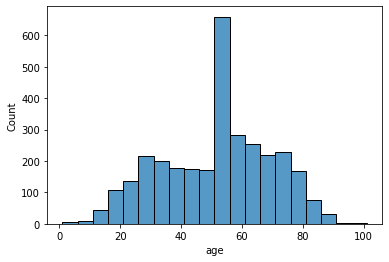

In [23]:
# Histogram showing the distribution of ages
sns.histplot(data=data,x='age',binwidth=5)

Most of the test subjects are between the ages of 49 and 54 years

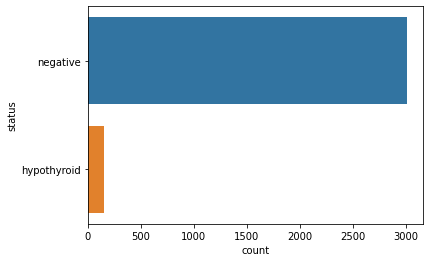

In [24]:
# Countplot of Status
sns.countplot(data=data, y='status', order= data.status.value_counts().index)

Most of the test subjects do not have hyperthyroid



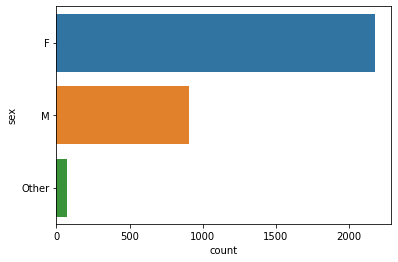

In [25]:
# Count plot of sex
sns.countplot(data=data, y='sex',order= data.sex.value_counts().index)

The dataset has more females than males or others

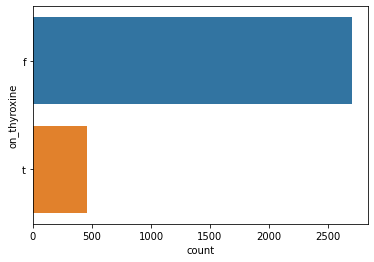

In [26]:
# Countplot of the test subjects on taking throxine
sns.countplot(data=data, y='on_thyroxine',order= data.on_thyroxine.value_counts().index)

Most of the subjects were not on thyroxine

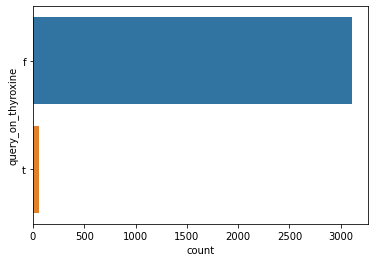

In [27]:
# Count plot on whether the test subjects were queried on thyroxine
sns.countplot(data=data, y='query_on_thyroxine',order= data.query_on_thyroxine.value_counts().index)

Almost none of the subjects were questioned on thyroxine

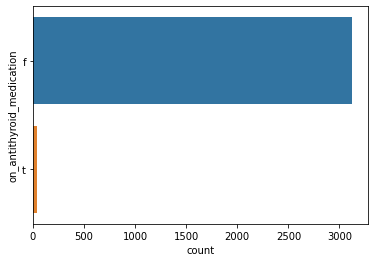

In [28]:
sns.countplot(data=data, y='on_antithyroid_medication',order= data.on_antithyroid_medication.value_counts().index)

Only a few of the patients were on anti thyroid medication

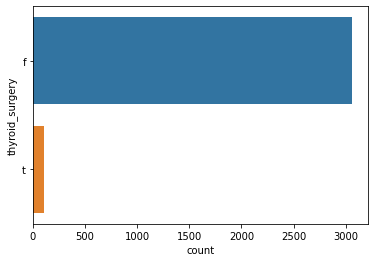

In [29]:
# 
sns.countplot(data=data, y='thyroid_surgery',order= data.thyroid_surgery.value_counts().index)

Most of the test subjects had not unergone thyroid surgery

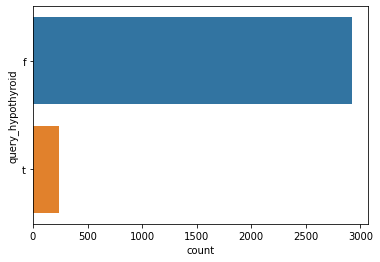

In [30]:
# Count plot on hypothroidism
sns.countplot(data=data, y='query_hypothyroid',order= data.query_hypothyroid.value_counts().index)

Most of the test subjects did not suffer from hypothyroidism

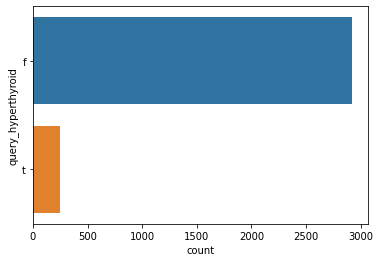

In [31]:
# Countplot on hyperthyroidism
sns.countplot(data=data, y='query_hyperthyroid',order= data.query_hyperthyroid.value_counts().index)

Most of the test subjects did not suffer from hyperthyroidism

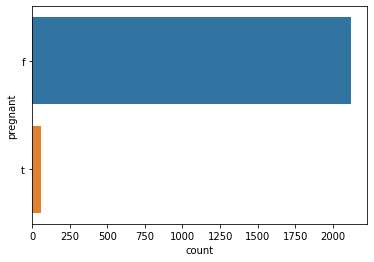

In [32]:
# Plot of pregnancy
# female = data.iloc(data['sex']=='F'
sns.countplot(data=data[data['sex']=='F'], y='pregnant',order= data.pregnant.value_counts().index)

Most of the female test subjects were not pregnant

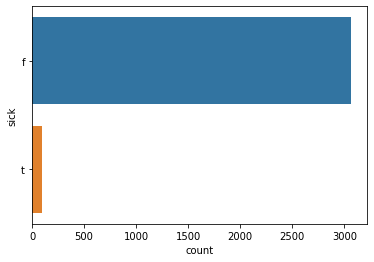

In [33]:
# Countplot of sick test subjects
sns.countplot(data=data, y='sick',order= data.sick.value_counts().index)

Most of the test subjects were not feeling sick

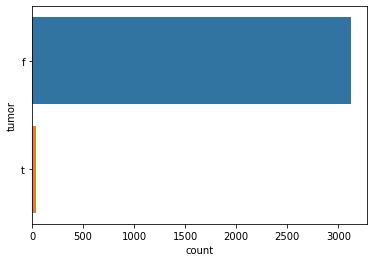

In [34]:
# Countplot of subjects with tumors
sns.countplot(data=data, y='tumor',order= data.tumor.value_counts().index)

Most of the test subjects did not have tumors

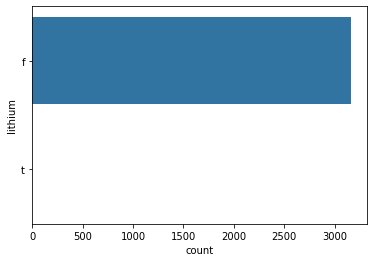

In [35]:
# Count plot of lithium
sns.countplot(data=data, y='lithium',order= data.lithium.value_counts().index)

Almost all of the test subjects do not use lithium

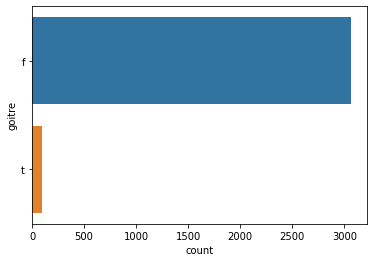

In [36]:
# Count plot of test subjects with goitre
sns.countplot(data=data, y='goitre',order= data.goitre.value_counts().index)

Most of the test subjects do not suffer from goitre

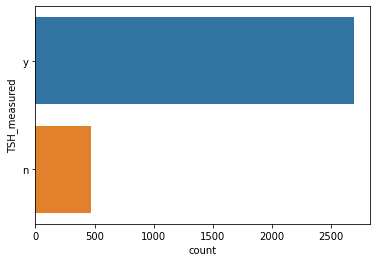

In [37]:
# Count plot of TSH measured
sns.countplot(data=data, y='TSH_measured',order= data.TSH_measured.value_counts().index)

Most of the test subjects were measured for TSH levels

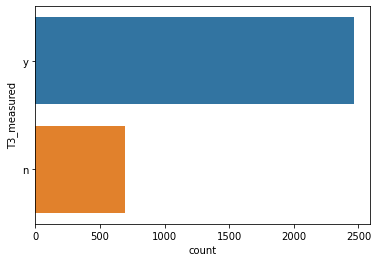

In [38]:
# Countplot of T3 measured
sns.countplot(data=data, y='T3_measured',order= data.T3_measured.value_counts().index)

About a third of the test subjects were not measured for T3 level

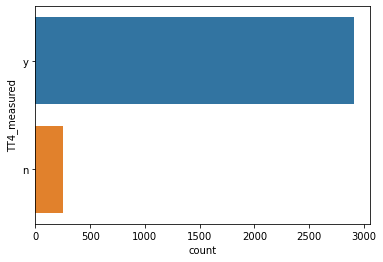

In [39]:
# Countplot of TT4 measured
sns.countplot(data=data, y='TT4_measured',order= data.TT4_measured.value_counts().index)

Most of the test subjects were measured for TT4 levels

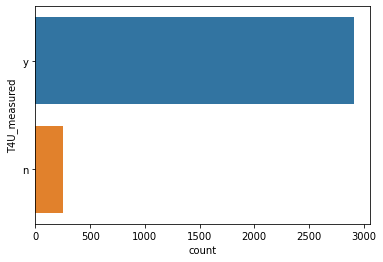

In [40]:
# Countplot of T4U measured
sns.countplot(data=data, y='T4U_measured',order= data.T4U_measured.value_counts().index)

Most of the test subjects were measured for T4U levels

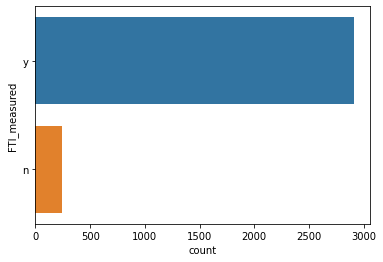

In [41]:
# Countplot of FTI measured
sns.countplot(data=data, y='FTI_measured',order= data.FTI_measured.value_counts().index)

Most of the test subjects were measured for FTI levels

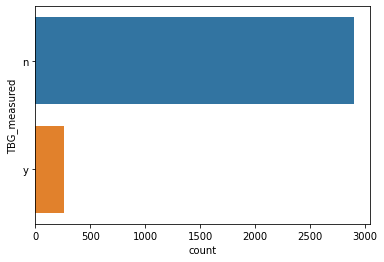

In [42]:
# Countplot of TBG measured
sns.countplot(data=data, y='TBG_measured',order= data.TBG_measured.value_counts().index)

Most of the test subjects were not measured for TBG levels

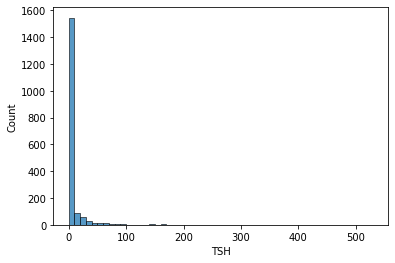

In [43]:
# Histogram of TSH score
sns.histplot(data= data[data['TSH']!=0], x='TSH',binwidth=10 )

Most common TSH score is between 0 and 5

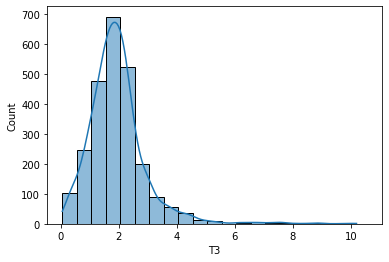

In [44]:
# Histplot of T3 score
sns.histplot(data= data[data['T3']!=0], x='T3', binwidth=0.5, kde=True)

Most common T3 score is between 1.5 and 2

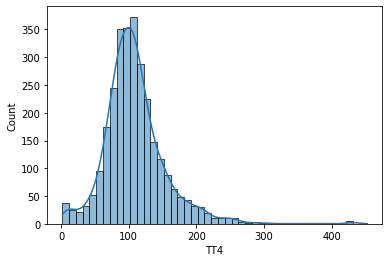

In [45]:
# Histplot of T3 score
sns.histplot(data= data[data['TT4']!=0], x='TT4', binwidth=10, kde=True)

Most common TT4 score is between 100 and 110

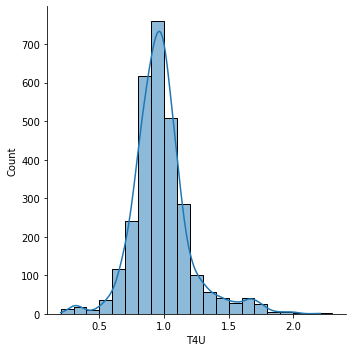

In [46]:
# Distribution plot of T4U score
sns.displot(data=data[data['T4U']!=0], x= 'T4U',binwidth=0.1, kde=True)

Most common T4Uscore is between 0.9 and 1.0

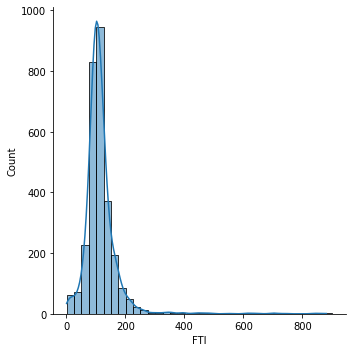

In [47]:
# Distribution plot of FTI score
sns.displot(data=data[data['FTI']!=0], x= 'FTI',binwidth=25, kde=True)

Most common FTI score is between 100 and 125

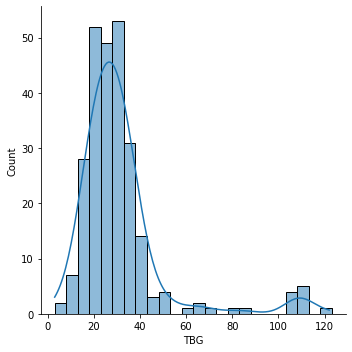

In [48]:
# Histogeam of the year the houses were built
sns.displot(data=data[data['TBG']!=0], x='TBG', binwidth=5, kde=True)

The most common TBG score is between 18 and 23



### b) Bivariate 

In [49]:
# Checking the correlation between numerical variables

correlations = data.corr()
correlations

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.011734,-0.079393,-0.005214,-0.028234,0.072096,-0.133119
TSH,0.011734,1.000000,-0.085072,-0.220293,0.095537,-0.186038,-0.052500
T3,-0.079393,-0.085072,1.000000,0.502813,0.457418,0.336268,-0.302469
TT4,-0.005214,-0.220293,0.502813,1.000000,0.599128,0.763978,-0.441062
T4U,-0.028234,0.095537,0.457418,0.599128,1.000000,0.204452,-0.618106
FTI,0.072096,-0.186038,0.336268,0.763978,0.204452,1.000000,-0.388026
TBG,-0.133119,-0.052500,-0.302469,-0.441062,-0.618106,-0.388026,1.000000


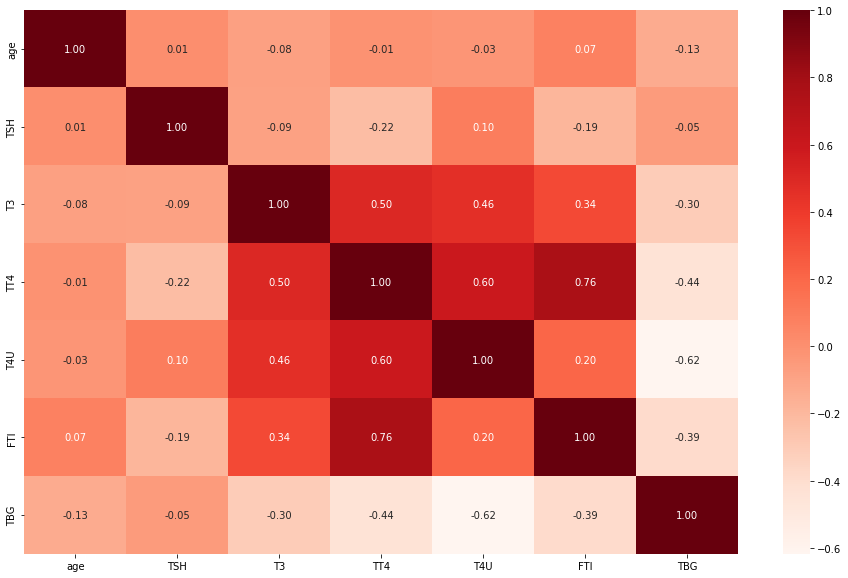

In [50]:
# Creating a correlation heat map for the columns
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

* T3 is positively correlated with TT4 and T4U
* TT4 has a strong positive correlation with FTI and T4U and a positive correlation with T3 and a negative correlation with TBG
* T4U has a strong positive correlation with TT4 and a positive correlation with T3 and a strong negative correlation with TBG
* FTI has a strong positive correlation with TT4
* TBG has a strong negative correlation with T4U and a negative correlation with TT4 


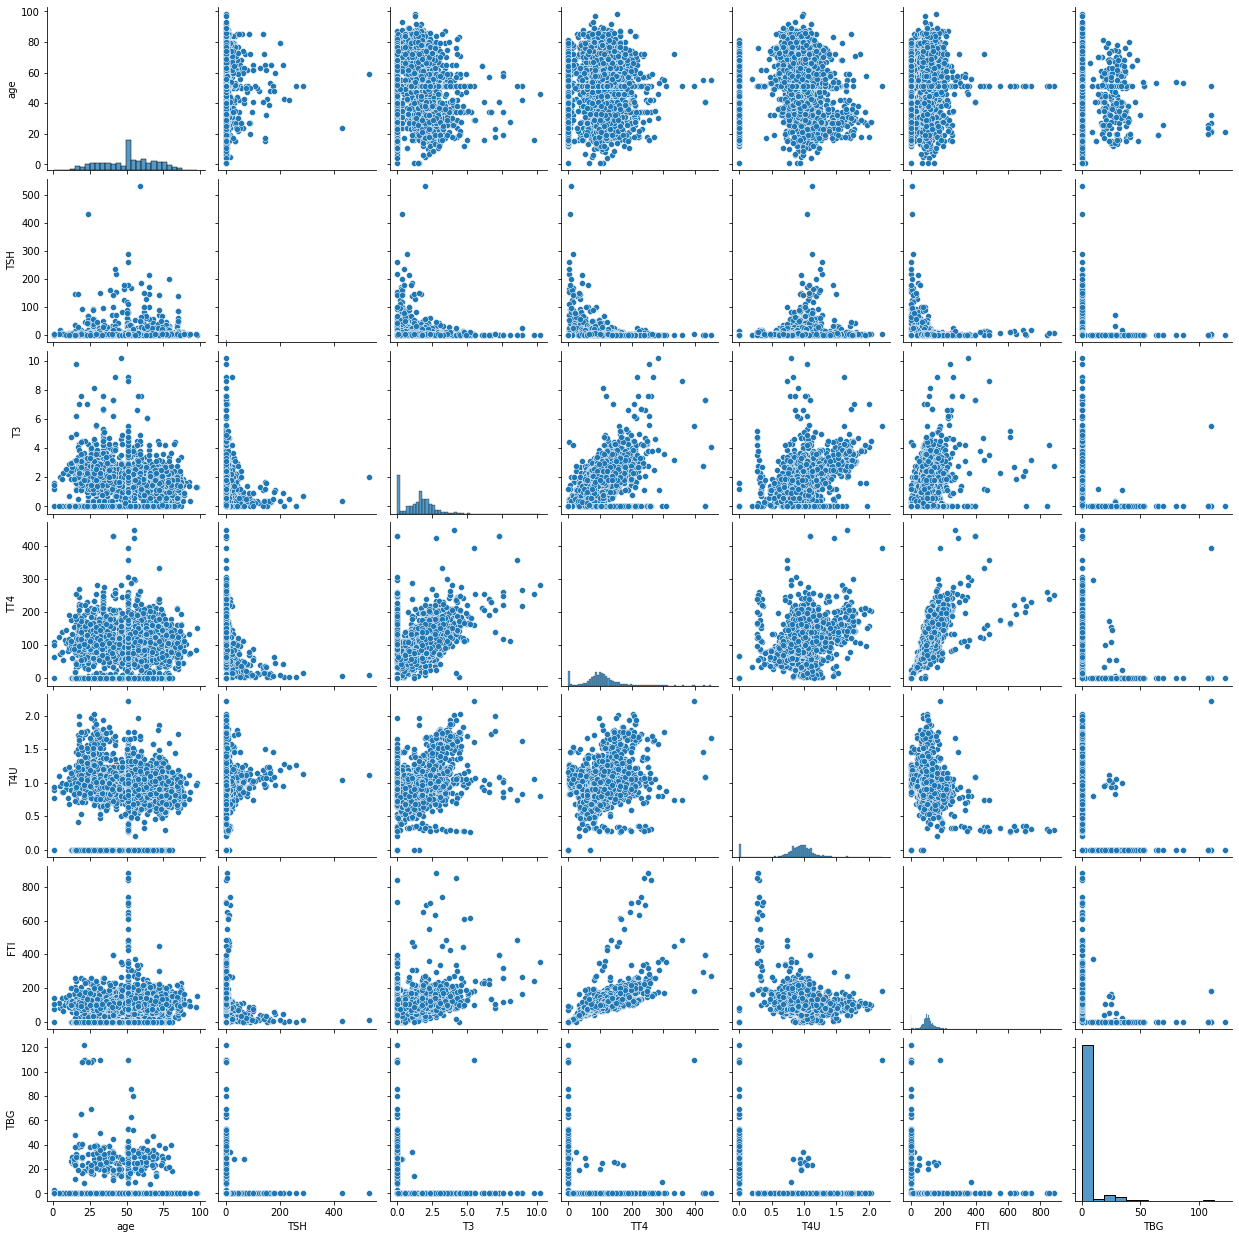

In [51]:
# Creating a pair plot of the data
sns.pairplot(data)

## Data Preprocessing

In [177]:
# Dataset for decision tree
data.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0


In [178]:
# Converting the binary values to 1 and 0
df_deci = data.replace({'f': 0 ,'t':1 , 'y':1 , 'n': 0})

In [179]:
df_deci.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0


In [180]:
# Converting sex column to dummy variable
sex = pd.get_dummies(df_deci.sex ,drop_first=True)
sex.head()

,M,Other
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0


In [181]:
# Merge the dummies dataframe to the dataset
data = pd.concat([df_deci,sex], axis=1)

In [182]:
# Dropping the categorical column
data = data.drop('sex',axis=1)
data.head(3)

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,M,Other
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0,1,0
1,hypothyroid,15.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0,0,0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0,1,0


In [183]:
# Changing the target variable to specified values
data.status = data.replace({'hypothyroid':1,'negative':0})
data.head()

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,M,Other
0,1.0,72.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0,1,0
1,1.0,15.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0,0,0
2,1.0,24.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0,1,0
3,1.0,24.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0,0,0
4,1.0,77.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0,1,0


In [62]:
# Split data into labels and features
test_features = ['age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'M', 'Other']

# Selecting the features
X = data[test_features].values

# Selecting the labels
y = data.status.astype(int)
y=y.values

In [63]:
# Split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Supervised learning

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

### a) Part 1: Decision trees:

#### 1.Decision trees

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9731437598736177


The accuracy of the base decision tree model is 97.3%

In [65]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[593  14]
 [  3  23]]


In [66]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       607
           1       0.62      0.88      0.73        26

   micro avg       0.97      0.97      0.97       633
   macro avg       0.81      0.93      0.86       633
weighted avg       0.98      0.97      0.98       633



The accuracy is high but for the patirnts without hypothyroidism but the F1 score for patients with hypothroidism is 73%

#### 2) Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
# Fitting RF classifier to the Training set
rand_forest = RandomForestClassifier()

# Train it on our training set.
rand_forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9794628751974723


In [124]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[601   6]
 [  7  19]]


In [115]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.76      0.73      0.75        26

   micro avg       0.98      0.98      0.98       633
   macro avg       0.87      0.86      0.87       633
weighted avg       0.98      0.98      0.98       633



The F1 score improves in the random forest class with hyperthyroidism ffro default decision trees

---



**Hyper parameter tuning**

In [102]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [2,5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100]}

In [116]:
# Creating the grid for tuning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid= param_grid, refit = True, verbose=2, cv=5 )

In [ ]:
# Fitting the hyperparameter grid to the train set
grid.fit(X_train,y_train)

In [118]:
# Getting the best parameters
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [119]:
# Showing the best estimators for the grid search CV
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
# Getting the predictions
y_pred_optimized = grid.predict(X_test)

In [121]:
# Getting the confusion metrics
print(metrics.confusion_matrix(y_test, y_pred_optimized))

[[602   5]
 [  5  21]]


In [122]:
# Getting the classifiction report
print(metrics.classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.81      0.81      0.81        26

   micro avg       0.98      0.98      0.98       633
   macro avg       0.90      0.90      0.90       633
weighted avg       0.98      0.98      0.98       633



After hyper parameter tuning the f1 score improved to 81% for predicting patients with hyperthyroidism

---



#### 3)Adaboost and gradient boost

In [110]:
# Importing the libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=0)
AdB_classifier.fit(X_train, y_train)

# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
GBM_classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [111]:
# Getting the predicted values
y_pred_AdB = AdB_classifier.predict(X_test)
y_pred_GBM = GBM_classifier.predict(X_test)

In [112]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy Ada Boost:",metrics.accuracy_score(y_test, y_pred_AdB))
print("Accuracy Gradient Boost:",metrics.accuracy_score(y_test, y_pred_GBM))


Accuracy RF: 0.985781990521327
Accuracy Ada Boost: 0.9794628751974723
Accuracy Gradient Boost: 0.9826224328593997


Accuracy is highest in Random forest, Gradient boost then ada boost

In [126]:
# Model confusion matrix , how often is the classifier correct?
print("Confusion matrix RF:"'\n',metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix Ada Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_AdB))
print("Confusion matrix Gradient Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_GBM))


Confusion matrix RF:
 [[601   6]
 [  7  19]]
Confusion matrix Ada Boost:
 [[599   8]
 [  5  21]]
Confusion matrix Gradient Boost:
 [[601   6]
 [  5  21]]


Accuracy for patients with hyperthroidism is better for gradient boost and ada boost compared to random forest

In [127]:
# Model classification_report matrix , how often is the classifier correct?
print("Confusion matrix RF:"'\n',metrics.classification_report(y_test, y_pred))
print("Confusion matrix Ada Boost:"'\n',metrics.classification_report(y_test, y_pred_AdB))
print("Confusion matrix Gradient Boost:"'\n',metrics.classification_report(y_test, y_pred_GBM))


Confusion matrix RF:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.76      0.73      0.75        26

   micro avg       0.98      0.98      0.98       633
   macro avg       0.87      0.86      0.87       633
weighted avg       0.98      0.98      0.98       633

Confusion matrix Ada Boost:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.72      0.81      0.76        26

   micro avg       0.98      0.98      0.98       633
   macro avg       0.86      0.90      0.88       633
weighted avg       0.98      0.98      0.98       633

Confusion matrix Gradient Boost:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.78      0.81      0.79        26

   micro avg       0.98      0.98      0.98       633
   macro avg       0.88      0.90      0.89

The f1 score is best with gradient boost which shows it is the best model for predicting patients with hypothyroidism

---



In [128]:
# Getting the important features
Important_features  = GBM_classifier.feature_importances_

In [129]:
# Creating a dataframe of feature names and features importances
FIM = pd.DataFrame({'Features': test_features 
                   , 'Feature_importance':Important_features})
FIM = FIM.sort_values(by=['Feature_importance'],ascending=False)
FIM

,Features,Feature_importance
13,TSH,6.304531e-01
21,FTI,3.171243e-01
19,T4U,1.622706e-02
3,on_antithyroid_medication,1.403092e-02
0,age,1.036199e-02
17,TT4,6.056461e-03
1,on_thyroxine,2.633510e-03
15,T3,1.643257e-03
4,thyroid_surgery,7.099228e-04
5,query_hypothyroid,6.005308e-04


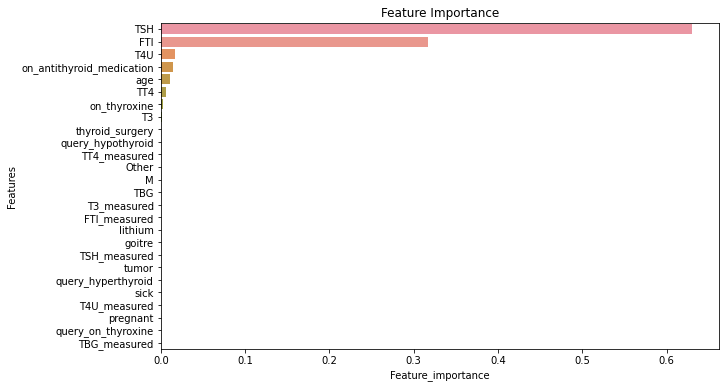

In [130]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

The most important features of prediction are TSH and FTI using gradient boosting

### b) Part 2: SVM

#### 1. Preprocessing

In [184]:
# Preview of processed dataset
data

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,M,Other
0,1.0,72.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0,1,0
1,1.0,15.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0,0,0
2,1.0,24.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0,1,0
3,1.0,24.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0,0,0
4,1.0,77.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0.0,58.0,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0,0.0,0,0
3159,0.0,29.0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0,0.0,0,0
3160,0.0,77.0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0,0.0,1,0
3161,0.0,74.0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0,0.0,0,0


In [186]:
# Scale the dataset while ensuring the label column is normal
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_sc = scale.fit_transform(data)
df_sc = pd.DataFrame(df_sc, columns=data.columns)
df_sc['status']=data['status']

In [187]:
# Preview of the scaled dataset
df_sc.head()

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,M,Other
0,1.0,1.165928,-0.413055,-0.133027,-0.116005,-0.184386,-0.287189,-0.288477,-0.142557,-0.179752,-0.113173,-0.025154,-0.179752,0.416719,1.126222,0.530664,-0.766612,0.292318,-1.621915,0.29168,1.695321,0.291041,-1.469368,-0.29927,-0.25204,1.575906,-0.153703
1,1.0,-2.022145,2.420986,-0.133027,-0.116005,-0.184386,-0.287189,-0.288477,-0.142557,-0.179752,-0.113173,-0.025154,-0.179752,0.416719,6.316553,0.530664,0.156480,0.292318,-1.545841,0.29168,0.669627,0.291041,-1.362656,-0.29927,-0.25204,-0.634556,-0.153703
2,1.0,-1.518765,-0.413055,-0.133027,-0.116005,-0.184386,-0.287189,-0.288477,-0.142557,-0.179752,-0.113173,-0.025154,-0.179752,0.416719,-0.227778,0.530664,-1.102282,0.292318,-1.831119,0.29168,0.288655,0.291041,-1.621814,-0.29927,-0.25204,1.575906,-0.153703
3,1.0,-1.518765,-0.413055,-0.133027,-0.116005,-0.184386,-0.287189,-0.288477,-0.142557,-0.179752,-0.113173,-0.025154,-0.179752,0.416719,19.179549,0.530664,-0.934447,0.292318,-1.793082,0.29168,0.405877,0.291041,-1.530347,-0.29927,-0.25204,-0.634556,-0.153703
4,1.0,1.445583,-0.413055,-0.133027,-0.116005,-0.184386,-0.287189,-0.288477,-0.142557,-0.179752,-0.113173,-0.025154,-0.179752,0.416719,0.101695,0.530664,-0.263108,0.292318,-0.823139,0.29168,1.109210,0.291041,-0.951053,-0.29927,-0.25204,1.575906,-0.153703


In [188]:
# Split data into labels and features
test_features = ['age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'M', 'Other']

# Selecting the features
X = data[test_features].values

# Selecting the labels
y = data.status.values


In [189]:
# Split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 2.Modeling

In [194]:
df_SVM

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,0.0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,0.0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,0.0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,0.0


In [195]:
df_SVM.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

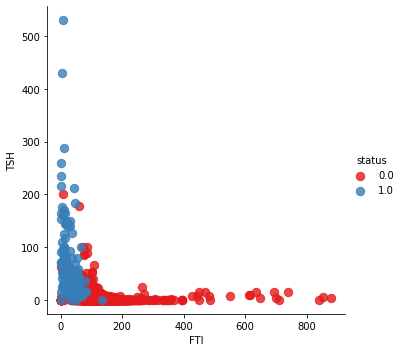

In [204]:
# We are going to use FTI and TSH as our classifying criteria. So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
sns.lmplot('FTI', 'TSH', data=data, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

It seems the two chosen columns can be separate labels via SVM

In [206]:
# Specify the input for the model

X = data[['FTI', 'TSH']]
# Put a label of either a muffin or not and assign it 0 or 1
y =data['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [208]:
from sklearn.svm import SVC

# Fitting SVM regression to the Training set
Linear_SVM= SVC(kernel = 'linear')
poly_SVM= SVC(kernel = 'poly')
rbf_SVM= SVC(kernel = 'rbf')

# Fitting the model
Linear_SVM.fit(X_train, y_train)
poly_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [209]:
# Predicting y
y_pred_lin = Linear_SVM.predict(X_test)
y_pred_poly = poly_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

In [211]:
# Checking the accurancy of the model
print('Accuracy linear: ',metrics.accuracy_score(y_test, y_pred_lin))
print('Accuracy polynomial: ',metrics.accuracy_score(y_test, y_pred_poly))
print('Accuracy rbf: ',metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy linear:  0.9731437598736177
Accuracy polynomial:  0.9684044233807267
Accuracy rbf:  0.9620853080568721


In [212]:
# Checking the confusion matrix of the model
print('Accuracy linear: ''\n',metrics.confusion_matrix(y_test, y_pred_lin))
print('Accuracy polynomial: ''\n',metrics.confusion_matrix(y_test, y_pred_poly))
print('Accuracy rbf: ''\n',metrics.confusion_matrix(y_test, y_pred_rbf))

Accuracy linear: 
 [[601   6]
 [ 11  15]]
Accuracy polynomial: 
 [[603   4]
 [ 16  10]]
Accuracy rbf: 
 [[606   1]
 [ 23   3]]


In [213]:
# Checking the classification report of the model
print('Accuracy linear: ''\n',metrics.classification_report(y_test, y_pred_lin))
print('Accuracy polynomial: ''\n',metrics.classification_report(y_test, y_pred_poly))
print('Accuracy rbf: ''\n',metrics.classification_report(y_test, y_pred_rbf))

Accuracy linear: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       607
         1.0       0.71      0.58      0.64        26

   micro avg       0.97      0.97      0.97       633
   macro avg       0.85      0.78      0.81       633
weighted avg       0.97      0.97      0.97       633

Accuracy polynomial: 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       607
         1.0       0.71      0.38      0.50        26

   micro avg       0.97      0.97      0.97       633
   macro avg       0.84      0.69      0.74       633
weighted avg       0.96      0.97      0.96       633

Accuracy rbf: 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       607
         1.0       0.75      0.12      0.20        26

   micro avg       0.96      0.96      0.96       633
   macro avg       0.86      0.56      0.59       633
weighted avg    

Linear SVM has the best f1 score thus is the most prefered classification model

---



In [214]:
# Using all the features
X = data[test_features]
y = data.status

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [215]:
# Fitting the model
Linear_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [216]:
# Predicting y
y_pred_lin = Linear_SVM.predict(X_test)

In [217]:
# Checking the classification report of the model
print('Accuracy linear: ''\n',metrics.classification_report(y_test, y_pred_lin))

Accuracy linear: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       607
         1.0       0.74      0.65      0.69        26

   micro avg       0.98      0.98      0.98       633
   macro avg       0.86      0.82      0.84       633
weighted avg       0.98      0.98      0.98       633



**Hyperparameter tuning**

In [218]:
# Setting up the hyperparameter
my_param_grid = {'C': [10,100,1000], 'gamma': ['scale',0.01,0.001], 'kernel': ['linear']} 

In [222]:
# Creating the grid for tuning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [223]:
# Fitting the hyperparameter grid to the train set
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=10, gamma=scale, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=10, gamma=scale, kernel=linear, total=   4.4s
[CV] C=10, gamma=scale, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] ................. C=10, gamma=scale, kernel=linear, total=   2.2s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV] ................. C=10, gamma=scale, kernel=linear, total=   2.1s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV] ................. C=10, gamma=scale, kernel=linear, total=   3.4s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV] ................. C=10, gamma=scale, kernel=linear, total=   1.5s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   4.3s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   2.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   2.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 23.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [224]:
# Getting the best parameters
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [225]:
# Getting the predictions
y_pred_optimized = grid.predict(X_test)

In [226]:
# Getting the classifiction report
print(metrics.classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       607
         1.0       0.71      0.65      0.68        26

   micro avg       0.97      0.97      0.97       633
   macro avg       0.85      0.82      0.83       633
weighted avg       0.97      0.97      0.97       633



More tuning required as the selected hyperparameters did not improve the model but is more accurate than the model with two features

## Conclusion

* Gradient boosted model provides the highest accuracy
* The initial goal of achieving 80% accuracy was achieved using the gradient boosted model
* Support vector machines does not do a better job of classifying compared to the GB model